# Khmer Sentiment Analysis
**Author:** Virak Den  
**Date:** May 2025  
**Project:** Adapted from Shopee Sentiment Analysis  
**Goal:** Perform sentiment analysis on Khmer reviews using localized preprocessing and classification.


## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



[nltk_data] Downloading package punkt to /Users/virakden/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load Khmer Dataset

In [24]:
# Load your modified CSV (example name: khmer_sentiment_sample.csv)
df = pd.read_csv("khmer_sentiment_sample.csv", encoding="utf-8")

# Preview the dataset
df.head()


,Review,SENTIMEN
0,ខ្ញុំស្រលាញ់ផលិតផលនេះ។,positive
1,សេវាកម្មល្អណាស់។,positive
2,ខ្ញុំពេញចិត្តជាមួយនឹងការទិញនេះ។,positive
3,វាជាបទពិសោធន៍ដ៏អស្ចារ្យ។,positive
4,ការផ្តល់សេវាជួសជុលលឿន និងមានប្រសិទ្ធភាព។,positive


## Preprocessing & Tokenization

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["SENTIMEN"])  # positive = 1, negative = 0
df.head()


,Review,SENTIMEN,label
0,ខ្ញុំស្រលាញ់ផលិតផលនេះ។,positive,1
1,សេវាកម្មល្អណាស់។,positive,1
2,ខ្ញុំពេញចិត្តជាមួយនឹងការទិញនេះ។,positive,1
3,វាជាបទពិសោធន៍ដ៏អស្ចារ្យ។,positive,1
4,ការផ្តល់សេវាជួសជុលលឿន និងមានប្រសិទ្ធភាព។,positive,1


In [ ]:

import re

# Custom Khmer tokenizer using regex
def regex_tokenize(text):
    clean_text = re.sub(
        r"[^\u1780-\u17FF\s]", "", str(text)
    )  # Remove non-Khmer symbols
    tokens = clean_text.split()
    return tokens

df["tokens"] = df["Review"].apply(regex_tokenize)
df.head()


,Review,SENTIMEN,label,tokens
0,ខ្ញុំស្រលាញ់ផលិតផលនេះ។,positive,1,[ខ្ញុំស្រលាញ់ផលិតផលនេះ។]
1,សេវាកម្មល្អណាស់។,positive,1,[សេវាកម្មល្អណាស់។]
2,ខ្ញុំពេញចិត្តជាមួយនឹងការទិញនេះ។,positive,1,[ខ្ញុំពេញចិត្តជាមួយនឹងការទិញនេះ។]
3,វាជាបទពិសោធន៍ដ៏អស្ចារ្យ។,positive,1,[វាជាបទពិសោធន៍ដ៏អស្ចារ្យ។]
4,ការផ្តល់សេវាជួសជុលលឿន និងមានប្រសិទ្ធភាព។,positive,1,"[ការផ្តល់សេវាជួសជុលលឿន, និងមានប្រសិទ្ធភាព។]"


## Feature Extraction (TF-IDF)

In [37]:
tfidf = TfidfVectorizer(tokenizer=regex_tokenize)
X = tfidf.fit_transform(df["Review"])
y = df["SENTIMEN"]


## Train-Test Split and Model

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## Evaluation

Classification Report:

              precision    recall  f1-score   support

    negative       0.70      1.00      0.82         7
    positive       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



/opt/miniconda3/envs/kh-sentiment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/kh-sentiment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/kh-sentiment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

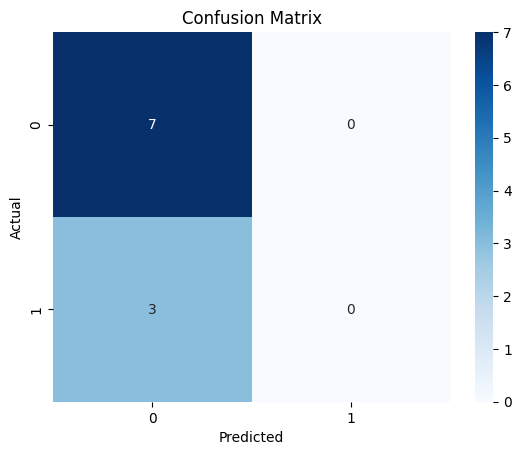

In [39]:
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Khmer WordCloud – if you have Khmer-compatible font

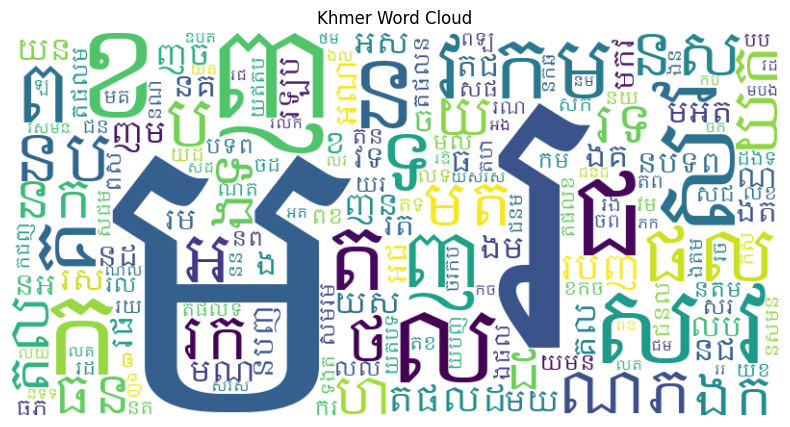

In [45]:
from wordcloud import WordCloud

# Combine all Khmer review text
khmer_text = " ".join(df["Review"].astype(str))

# Create WordCloud with Khmer font
wordcloud = WordCloud(
    font_path="assets/KhmerOS.ttf",  # ✅ Make sure this path is correct
    width=800,
    height=400,
    background_color="white",
).generate(khmer_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Khmer Word Cloud")
plt.show()


In [46]:
# Positive reviews only
positive_text = " ".join(df[df["SENTIMEN"] == "positive"]["Review"].astype(str))
wordcloud_pos = WordCloud(
    font_path="assets/KhmerOS.ttf", width=800, height=400, background_color="white"
).generate(positive_text)
wordcloud_pos.to_file("positive_wordcloud.png")

# Negative reviews only
negative_text = " ".join(df[df["SENTIMEN"] == "negative"]["Review"].astype(str))
wordcloud_neg = WordCloud(
    font_path="assets/KhmerOS.ttf", width=800, height=400, background_color="white"
).generate(negative_text)
wordcloud_neg.to_file("negative_wordcloud.png")
